<a href="https://colab.research.google.com/github/mohamed-nagy11/AI/blob/main/Linear%20Regression%20/Sales%20Based%20on%20TV%20Marketing/Linear_regression_complete_example_tvmarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

https://www.kaggle.com/code/devzohaib/simple-linear-regression

This notebook builds a simple linear regression model to predict sales '`sales`' using the TV marketing costs '`TV`' as the predictor variable.


## Drive Mount
Connect Colab to Drive and add the path of the dataset.

In [2]:
# Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change the Directory to the Folder Containing the Dataset File
%cd /content/drive/MyDrive/Colab Notebooks/ML/Linear Regrission

/content/drive/MyDrive/Colab Notebooks/ML/Linear Regrission


## Data Exploration

In [4]:
import pandas as pd

In [5]:
# Reading CSV File
dataset = pd.read_csv('tvmarketing.csv')

In [6]:
# Displat the First 5 Rows
dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
# Display the Last 5 Rows
dataset.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [8]:
# Display Columns Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [9]:
# Display the Shape of the Dataset
dataset.shape

(200, 2)

In [10]:
# Display Statistical Info about the dataset
dataset.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## Dataset Visualization

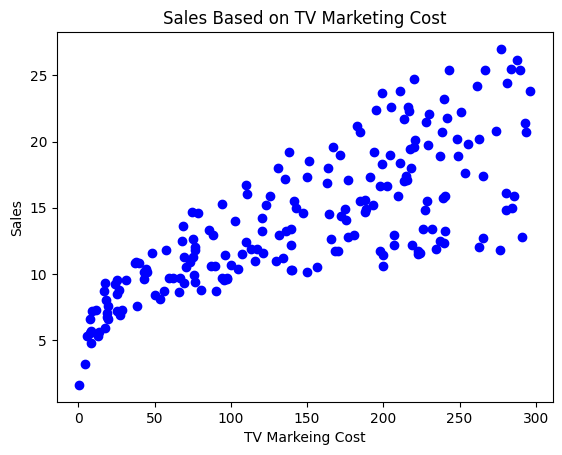

In [11]:
# Plot the Dataset
import matplotlib.pyplot as plt

plt.scatter(dataset.TV, dataset.Sales, color='blue')
plt.xlabel('TV Markeing Cost')
plt.ylabel('Sales')
plt.title('Sales Based on TV Marketing Cost')
plt.show()

* Dataframes can be ploted using the method `plot()` withoiut using matplotlib.  
* **Important Note:** `x` and `y` parameter values in `plot()` must be similar to the column names.

Text(0.5, 0, 'TV Markeing Cost')

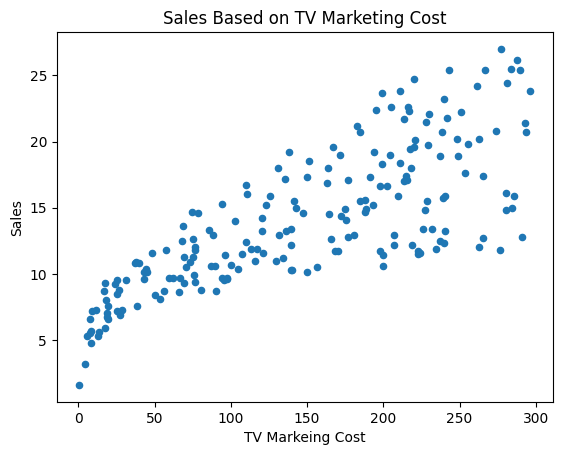

In [12]:
# Plot the Dataset
dataset.plot(x='TV', y='Sales', kind='scatter')
plt.title('Sales Based on TV Marketing Cost')
plt.xlabel('TV Markeing Cost')

## Linear Regrission
$Sales = \theta_0 + \theta_1 × TV$


In [13]:
# Libraries Import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
# Dataset Preparation
x = dataset['TV']
y = dataset['Sales']

In [15]:
# Display the Firt 5 Rows of x (TV Marketing Cost)
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
# Display the Last 5 Rows of x (TV Marketing Cost)
x.tail()

,TV
195,38.2
196,94.2
197,177.0
198,283.6
199,232.1


In [17]:
# Display the Firt 5 Rows of y (Sales)
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [18]:
# Display the Last 5 Rows of y (Sales)
y.tail()

,Sales
195,7.6
196,9.7
197,12.8
198,25.5
199,13.4


## Spliting the Dataset into Training and Testing Sets

###`train_test_split()`
#### Parameters
*   `x`: 2D Feature Matrix
*   `y`: 1D Target Vector
*   `test_size`: The Percentage of the Dataset Used for Testing
*   `train_size`: The Percentage of the Dataset Used for Training
*   `random_state`: A seed for the random number generator. This ensures the split is reproducible.
*   `shuffle`: Shuffles the dataset before splitting it

#### Outputs
*   `x_train`: The subset of features (x) that will be used to train the model
*   `x_test`: The subset of features (x) that will be used to test the model
*   `y_train`: The corresponding target values for X_train.
*   `y_test`: The corresponding target values for X_test.

In [19]:
# Split the Data into Training and Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [20]:
# Display Training and Testing Sets Sizes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160,)
(160,)
(40,)
(40,)


* It is noticed that training and testing sets are read as rows (vectors) not columns. This happens when you use scikit-learn to read a single feature from a CSV file.
* The x-axis of the training and testing sets must be converted to 2D.
* This can be done in 2 ways:
  * Using `x_train = x_train.values.reshape(-1, 1)`:
    1. `x_train.values`: This converts the pandas Series to a NumPy array first.   
     **Note:** `x_train` can be first transformed into an array using `x_train = np.array(x_train)` and then you can drop the attribure `.values`.
    2. `.reshape(-1, 1)`: This reshapes the NumPy array into a new shape. The -1 tells NumPy to automatically calculate the number of rows based on the number of elements and the specified number of columns which is 1. This results in a 2D array with one column and as many rows as there were elements in the original array.
  * Using `x_train = x_train.values[:, np.newaxis]`:
    1. `x_train.values`: This converts the pandas Series to a NumPy array first.   
     **Note:** `x_train` can be first transformed into an array using `x_train = np.array(x_train)` and then you can drop the attribure `.values`.
    2. `[:, np.newaxis]`: This uses NumPy's slicing capabilities. `:` selects all rows, and `np.newaxis` is used to insert a new axis (dimension) at the specified position. In this case, it inserts a new axis as the second dimension, effectively turning the 1D Series into a 2D array with one column.


In practice, for this specific task of converting a 1D feature vector into a 2D feature matrix with a single feature, both methods achieve the same result. `x_train.values.reshape(-1, 1)` is more explicit about reshaping, while `x_train[:, np.newaxis]` is a concise way to add a new dimension using slicing.

<br>


However, I recommend using `x_train.reshape(-1, 1)` because if you mistakenly ran it more than once, the dimensions would not change as they are clearly defined in the parameters, unlike `x_train[:, np.newaxis]` that would add a new dimension.

<br>

This action must be done on both `x_train` and `x_test`.

In [21]:
import numpy as np

# Transform x_train and x_test into Arrays to Use .reshape()
x_train = np.array(x_train)
x_test = np.array(x_test)

# Convert x_train and x_test to 2D
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Display Shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 1)
(160,)
(40, 1)
(40,)


## Fitting a Linear Regression Model

In [22]:
# Create a Linear Regrission Model
model = LinearRegression()

# Fit the Model to the Training Data
model.fit(x_train, y_train)

LinearRegression()

In [23]:
# Calculate Coefficients
theta_0 = model.intercept_
theta_1 = model.coef_[0]

print(f"y = {theta_0:.4f} + {theta_1:.4f}x")

y = 7.2925 + 0.0460x


## Predictions Using Testing Set

In [24]:
## Make Predictions on the Testing Set
y_predict = model.predict(x_test)

## Root Mean Square Error (RMSE) and $R^2$

In [25]:
# Check the Size of the Predictions to Generate Indces for the Plot
y_predict.shape

(40,)

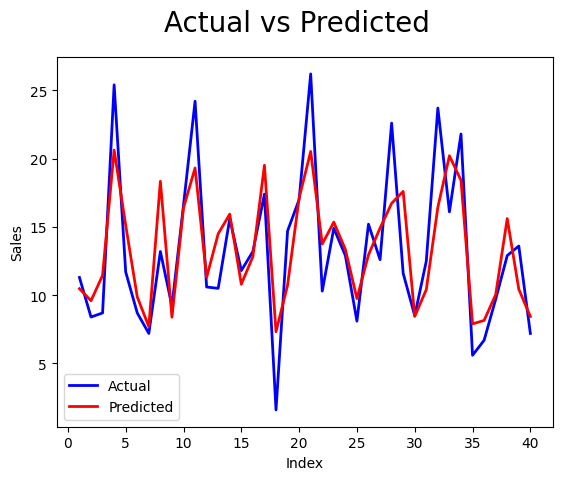

In [26]:
import matplotlib.pyplot as plt

# Generate Indeces for the Plot
c = [i for i in range(1, y_test.shape[0]+1)]

# Create a Plot to Compare the Actual and Predicted Data
actual_vs_predict_fig = plt.figure()
plt.plot(c, y_test, color= 'blue', linewidth=2, linestyle='-', label='Actual')
plt.plot(c, y_predict, color= 'red', linewidth=2, linestyle='-', label='Predicted')
actual_vs_predict_fig.suptitle('Actual vs Predicted', fontsize=20)
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()

Text(0, 0.5, 'Error')

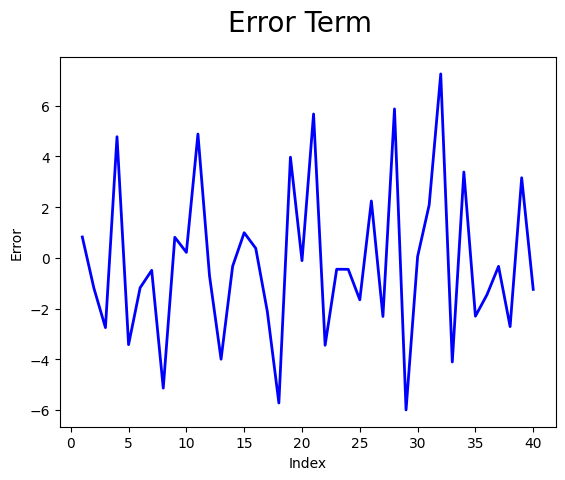

In [27]:
# Error Term Plot
error_fig = plt.figure()
plt.plot(c, y_test-y_predict, color= 'blue', linewidth=2, linestyle='-')
error_fig.suptitle('Error Term', fontsize=20)
plt.xlabel('Index')
plt.ylabel('Error')

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate the R-squared (R2) Score
r2 = r2_score(y_test, y_predict)

print(f"MSE: {mse:.4f}")    # 10.1862 is too high
print(f"RMSE: {rmse:.4f}")  # 3.1616 is too high
print(f"R2: {r2:.4f}")      # 0.6763 is too small

MSE: 10.1862
RMSE: 3.1916
R2: 0.6763


## Training Data, Testing Data, and Regrission Line Visualization

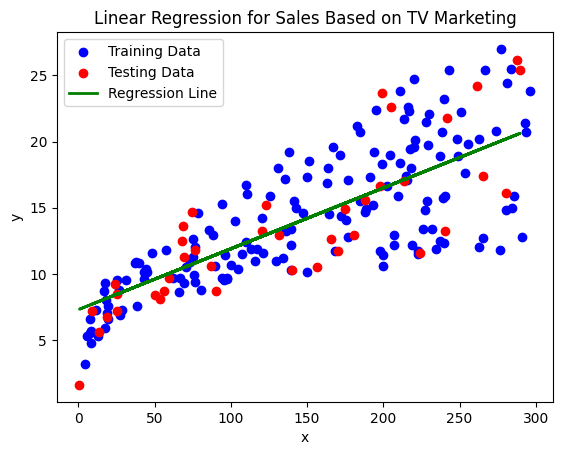

In [29]:
# Plot the Training Data, Testing Data, and Regrission Line
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='red', label='Testing Data')
plt.plot(x_test, y_predict, color='green', label='Regression Line', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression for Sales Based on TV Marketing')
plt.show()

## Comments

Based on the previous scatter plot, while there's a general linear trend between TV marketing costs and sales, there seems to be some non-linearity, especially at lower TV values, and the spread of sales values appears to increase as TV costs increase (this is called heteroscedasticity). Simple linear regression assumes a strictly linear relationship and constant variance of errors, which might explain why the current results aren't  good.

# Recommendations

Here are some recommendations for improvement and considerations for other models:

### Recommendations for Improving Linear Regression:

1. **Check for Outliers:** Outliers can significantly impact linear regression. Visualizing the data and using statistical methods to identify and potentially handle outliers could help.
2. **Feature Transformation:** Consider transforming the 'TV' variable. Sometimes, applying transformations like a logarithmic or square root transformation can help linearize the relationship or stabilize the variance. You could also try transforming the 'Sales' variable.
3. **Polynomial Features:** Since there might be some non-linearity, you could try adding polynomial terms of 'TV' (e.g., TV^2, TV^3) to the linear regression model. This is known as polynomial regression and can capture curved relationships.
Considering Other Models:

### Considerations for Other Models

While simple linear regression is a good starting point, depending on the complexity of the relationship and your goals, other models could be explored:

1. **Polynomial Regression:** As mentioned above, this is an extension of linear regression that can model non-linear relationships.
2. **Tree-Based Models (e.g., Decision Trees, Random Forests):** These models can capture complex, non-linear relationships automatically and are less sensitive to the distribution of the data.
3. **Support Vector Regression (SVR):** SVR can be effective for both linear and non-linear regression tasks.

To determine the "best" model, you would typically train several different models and compare their performance using metrics like RMSE, MSE, and R-squared on the test set.